# Voronoi diagram

In [33]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.spatial import Delaunay , Voronoi, voronoi_plot_2d
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra

In [3]:
points = np.array([(randint(0, 100), randint(0, 100)) for _ in range(50)])

In [5]:
triangles = Delaunay(points)
vor = Voronoi(points)

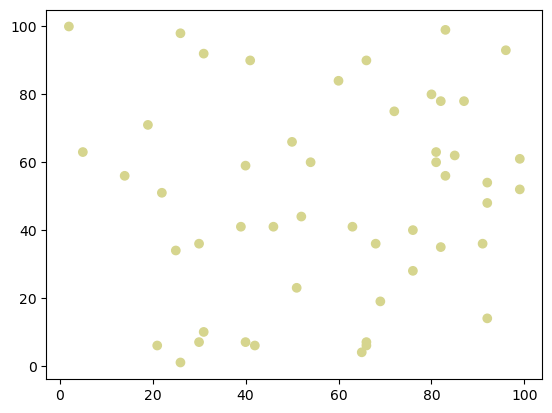

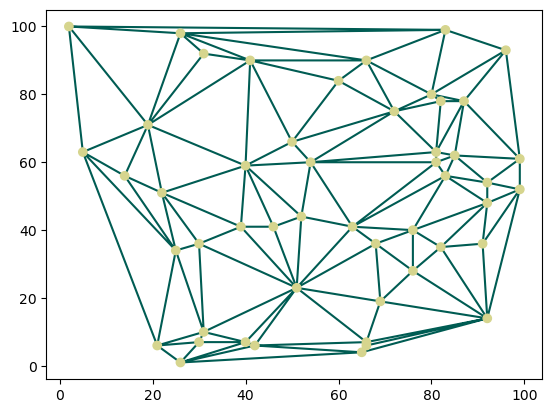

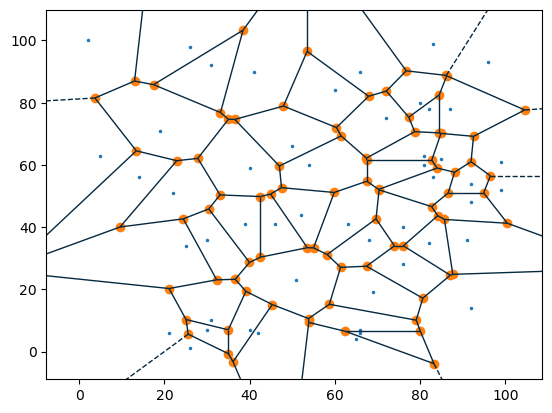

In [9]:
plt.scatter(points[:,0],points[:,1] , color=["#D6D58E"]*len(points))
plt.savefig('points.svg', transparent=True)
plt.show()
plt.triplot(points[:,0],points[:,1],triangles.simplices,color="#005C53")
plt.scatter(points[:,0],points[:,1] , color=["#D6D58E"]*len(points))
plt.savefig('delaunay_diagram.svg', transparent=True)
plt.show()
voronoi_plot_2d(vor, line_colors="#042940", point_size=3)
plt.savefig('voronoi_diagram.svg', transparent=True)
plt.show()

In [11]:
interior_points = []
for rigde in vor.ridge_vertices:
    if rigde[0] >= 0 and rigde[1]>= 0 : 
        interior_points.append(rigde)
max_indices = np.array(interior_points).flatten().max()     
adj_matrix = np.zeros((max_indices+1,max_indices+1))

In [15]:
for rigde in interior_points:
    id1 , id2 = rigde[0], rigde[1]
    adj_matrix[id1, id2] = np.linalg.norm(np.array(vor.vertices[id2]) - np.linalg.norm(vor.vertices[id1]))
    adj_matrix[id2, id1] = np.linalg.norm(np.array(vor.vertices[id1]) - np.linalg.norm(vor.vertices[id2]))


In [17]:
graph = csr_matrix(adj_matrix)

In [21]:
index_end = 85
dist_matrix , predecessors = dijkstra(csgraph=graph , directed=False, return_predecessors=True, indices=index_end)

In [23]:
predecessors

array([   26,    13,     5,     2,    25,    24,     0,    15,     7,
          13,    21,    44,     0,    12,    19,    14,    37,    15,
          45,    18,    11,    20,    27,    22,    23,    46,    86,
          59,    61,    30,    28,    43,    36,    32,    33,    31,
          65,    38,    48,    40,    62,    42,    30,    66,    63,
          44,    49,    48,    50,    51,    45,    64,    74,    35,
          60,    67,    58,    56,    69,    84,    58,    59,    61,
          87,    68,    64,    67,    69,    70,    70,    85,    43,
          71,    55,    75,    73,    78,    54,    81,    62,    79,
          80,    83,    79,    85, -9999,    84,    85])

algorith took 8 iterations


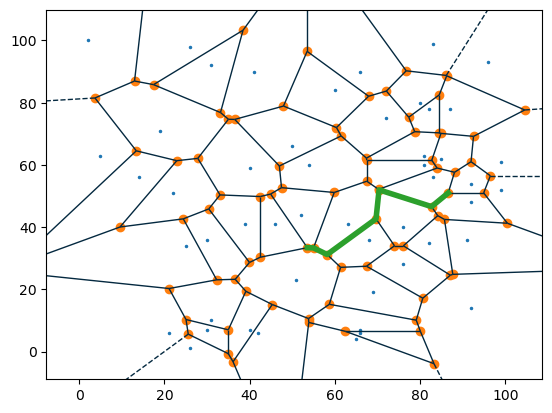

In [29]:
index_start  = 35
n_iterations = 0
path_x = []
path_y = []
voronoi_plot_2d(vor, line_colors="#042940", point_size=3)
while index_start != -9999 :
    next_el =  predecessors[index_start]
    if next_el >=0 :
        point = vor.vertices[next_el]
        path_x.append(point[0])
        path_y.append(point[1])
    index_start = next_el
    n_iterations += 1
plt.plot(path_x, path_y , linewidth = 4)
plt.savefig('voronoi_shortest_path_diagram.svg', transparent=True)
print(f"algorith took {n_iterations} iterations")
plt.show()